In [1]:
#importing libraries
import numpy as np
import pandas as pd

In [2]:
#Loading the dataset
df=pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df['label']=df['toxic']+df['severe_toxic']+df['obscene']+df['threat']+df['insult']+df['identity_hate']

In [4]:
df['label'] = np.where(df['label'] >= 1, 1.0, 0.0)

In [5]:
df.to_csv('label.csv')

In [6]:
df['label'].value_counts()

0.0    143346
1.0     16225
Name: label, dtype: int64

In [7]:
from wordcloud import WordCloud

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

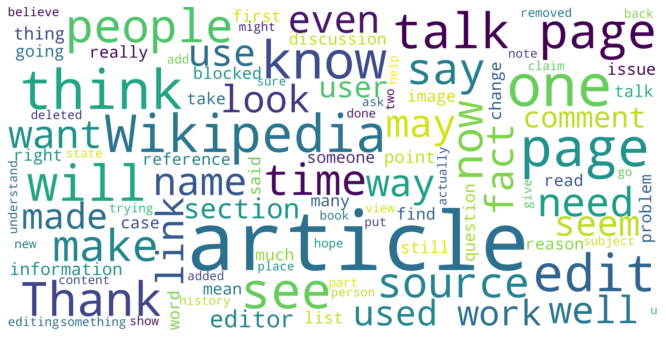

In [ ]:
word_cloud_text = ''.join(df['comment_text'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

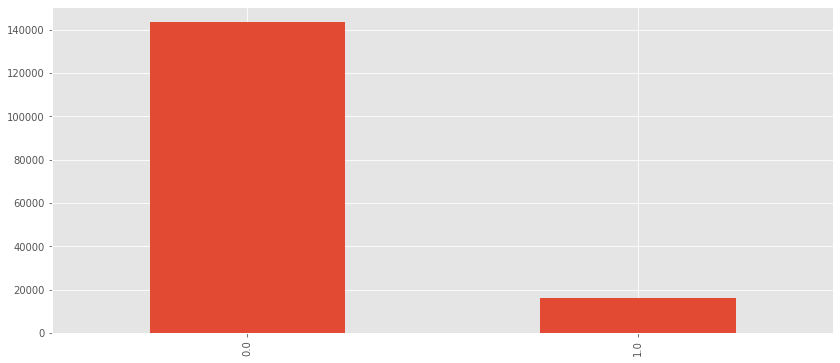

In [9]:
df.label.value_counts().plot.bar()
plt.show()

In [10]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0.0


In [11]:
df=df.drop(['id','toxic','severe_toxic','obscene','threat','insult','identity_hate'],axis=1)
df.head()

,comment_text,label
0,Explanation\nWhy the edits made under my usern...,0.0
1,D'aww! He matches this background colour I'm s...,0.0
2,"Hey man, I'm really not trying to edit war. It...",0.0
3,"""\nMore\nI can't make any real suggestions on ...",0.0
4,"You, sir, are my hero. Any chance you remember...",0.0


In [12]:
df.iloc[3,0]

'"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It\'s listed in the relevant form eg Wikipedia:Good_article_nominations#Transport  "'

In [13]:
messages=df['comment_text']

# Text Preprocessing

In [14]:
#importing libraries
import re
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].str.replace(r"i'm", "i am")
    df[text_field] = df[text_field].str.replace(r"can't", "can not")
    df[text_field] = df[text_field].str.replace(r"what's", "what is")
    df[text_field] = df[text_field].str.replace(r"wouldn't", "would not")
    df[text_field] = df[text_field].str.replace(r'[^A-Za-z0-9 ]+', ' ')
    df[text_field] = df[text_field].str.replace(r"@", "at")
    return df

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
cleaned_text = standardize_text(df, "comment_text")



In [20]:
cleaned_text

,comment_text,label
0,explanation why the edits made under my userna...,0.0
1,d aww he matches this background colour i am ...,0.0
2,hey man i am really not trying to edit war i...,0.0
3,more i can not make any real suggestions on i...,0.0
4,you sir are my hero any chance you remember...,0.0
...,...,...
159566,and for the second time of asking when your ...,0.0
159567,you should be ashamed of yourself that is a h...,0.0
159568,spitzer umm theres no actual article for pro...,0.0
159569,and it looks like it was actually you who put ...,0.0


In [22]:
messages=cleaned_text['comment_text']
for i in range(0, len(messages)):
    review = messages[i]
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

RecursionError: ignored

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y=cleaned_text['label']



# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [ ]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
toxic_comment_model = MultinomialNB().fit(X_train, y_train)

y_pred=toxic_comment_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

In [ ]:
lr_model = LogisticRegression() # Logistic regression
lr_model.fit(X_train, y_train) # Fitting a logistic regression model

## Predicting the output
test_pred = lr_model.predict(X_test) # Class prediction

## Calculate key performance metrics
print(accuracy_score(test_pred,y_test))
print("F1 score: ", f1_score(y_test, test_pred))